In [1]:
import pandas as pd 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


In [2]:
fraud_check=pd.read_csv("Fraud_check.csv")
fraud_check


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
import warnings
warnings.filterwarnings("ignore")

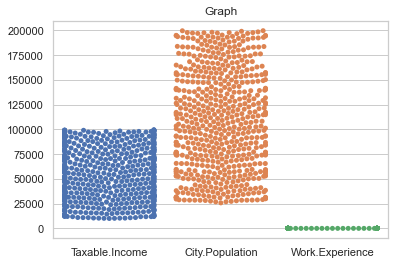

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.swarmplot(data=fraud_check)
 
plt.title('Graph')
 
plt.show()


<AxesSubplot:>

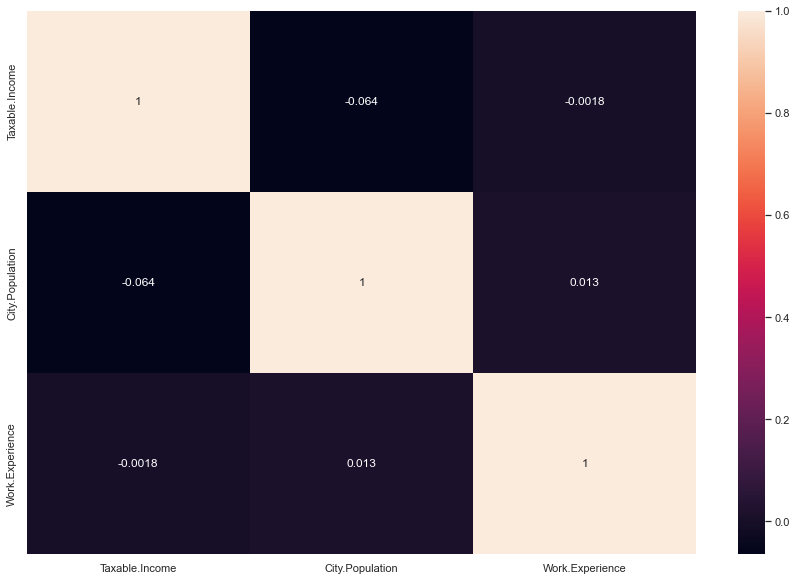

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(fraud_check.corr(),annot=True)

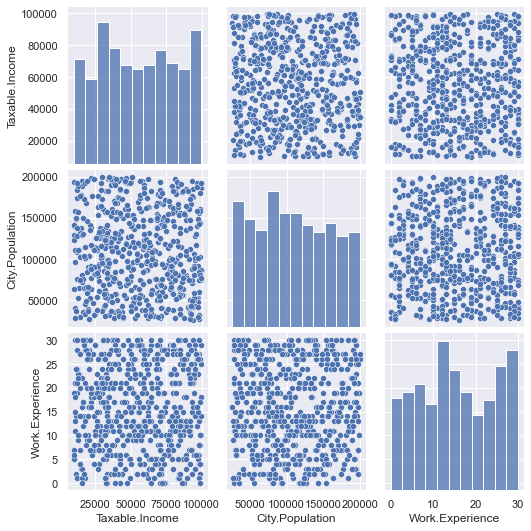

In [6]:
sns.set_style('darkgrid')
sns.pairplot(fraud_check)
plt.show()

In [7]:
# create a column income and fill data whose Taxable.Income is >=30000 is Good and <=30000 is Risky

fraud_check.loc[fraud_check['Taxable.Income']>=30000,"income"]="Good"
fraud_check.loc[fraud_check['Taxable.Income']<=30000,"income"]="Risky"

In [8]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [14]:
fraud_check1=pd.DataFrame(fraud_check)
fraud_check1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [15]:
first_column=fraud_check1.pop('Taxable.Income')


In [16]:
fraud_check1.insert(0,'Taxable.Income',first_column)
fraud_check1

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,68833,NO,Single,50047,10,YES,Good
1,33700,YES,Divorced,134075,18,YES,Good
2,36925,NO,Married,160205,30,YES,Good
3,50190,YES,Single,193264,15,YES,Good
4,81002,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,76340,YES,Divorced,39492,7,YES,Good
596,69967,YES,Divorced,55369,2,YES,Good
597,47334,NO,Divorced,154058,0,YES,Good
598,98592,YES,Married,180083,17,NO,Good


In [12]:
#label Incodel Function convert categorical  into  Binomial 
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()


In [17]:
fraud_check1['Undergrad']=label_encoder.fit_transform(fraud_check1['Undergrad'])
fraud_check1['Marital.Status']=label_encoder.fit_transform(fraud_check1['Marital.Status'])
fraud_check1['Urban']=label_encoder.fit_transform(fraud_check1['Urban'])
fraud_check1['income']=label_encoder.fit_transform(fraud_check1['income'])


In [18]:
fraud_check1

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,68833,0,2,50047,10,1,0
1,33700,1,0,134075,18,1,0
2,36925,0,1,160205,30,1,0
3,50190,1,2,193264,15,1,0
4,81002,0,1,27533,28,0,0
...,...,...,...,...,...,...,...
595,76340,1,0,39492,7,1,0
596,69967,1,0,55369,2,1,0
597,47334,0,0,154058,0,1,0
598,98592,1,1,180083,17,0,0


In [19]:
fraud_check1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Taxable.Income   600 non-null    int64
 1   Undergrad        600 non-null    int32
 2   Marital.Status   600 non-null    int32
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


## Random Forest Classification


In [20]:
fraud_check2=fraud_check1.iloc[:,1:]
fraud_check2


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [21]:
fraud_check2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   income           600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [22]:
array=fraud_check2.values
x=array[:,0:5]
y=array[:,5]
max_features=2
num_trees=500
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
#create a model

model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.74


## Bagged Decision Trees for Classification


In [23]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X = array[:,0:5]
Y = array[:,5]
seed=7

kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.7433333333333333


## AdaBoost Classification


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
X = array[:,0:5]
Y = array[:,5]
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7933333333333332
